In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [6]:
 #Cargar el archivo CSV
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\dataset_b_spoti.csv"
df = pd.read_csv(file_path)



In [4]:
df.head()

,artist_name,song_name,recording_id,danceable,not_danceable,male,female,timbre_bright,timbre_dark,tonal,...,album_name,album_release_date,duration_ms,popularity,language,playlist_ids,positions,playlists_names,combined_genres,processed_lyrics
0,car seat headrest,leave together,0094daaa-f455-44a3-90fa-08dd4bf73b20,0.187,0.813,0.919,0.081,0.130,0.870,0.578,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,making love to you when youre invisible making...
1,creutzfeld jakob,software,00cf3fdc-998b-45ae-9e14-2dda4c82d542,0.963,0.037,0.787,0.213,0.093,0.907,0.163,...,NaN,NaN,NaN,NaN,de,NaN,NaN,NaN,hiphop hip hop german deutschrap rap german hi...,hey you never told me how to play hey you neve...
2,tommy genesis,art,01b434bc-2594-4cbf-9d59-0662218e1a87,0.997,0.003,0.992,0.008,0.123,0.877,0.038,...,NaN,NaN,NaN,NaN,en,"[137550, 145608, 185453, 453041, 463933, 49507...","[57, 51, 24, 32, 172, 33, 88]",chantal 18th phoenix only you werk lit af chi...,rap hiphop cloud rap electronic hip hop,verse 1 i am weak you pull the curtain over me...
3,stitched up heart,frankenstein,01effc90-0e90-4855-8ae9-0463dad65bee,0.813,0.187,0.130,0.870,0.013,0.987,0.486,...,NaN,NaN,NaN,NaN,en,"[144101, 15541, 161563, 233123, 277318, 30696,...","[189, 56, 156, 65, 84, 35, 8, 2, 37, 117, 12]",heavy rock favorites 3 my music trash homework...,alternative rock female vocalists alternative ...,theres a skeleton key that lies on the stairs ...
4,12 stones,psycho,022504b0-dba8-4af9-8350-5d9649b432ad,0.042,0.958,0.685,0.315,0.017,0.983,0.073,...,NaN,NaN,NaN,NaN,en,"[100334, 139584, 159374, 212337, 274847, 28777...","[72, 1, 105, 68, 18, 24, 23, 1, 111, 12, 81, 8...",random lullabies whiskey gasoline mine baby li...,alternative rock rock christian rock alternati...,hush a bye dont you cry go to sleep you little...


In [15]:
# ver columnas completas
pd.set_option('display.max_columns', None)
#ver filas completas
pd.set_option('display.max_rows', None)
# ver contenido de las celdas completo
pd.set_option('display.max_colwidth', None)

In [17]:
import pandas as pd

# 📂 Rutas de los archivos
file_spotify_data = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_large_updated.csv"
file_to_update = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_lyrics_faltan_traduc_idioma_2_faltaspoty.csv"
output_file = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto.csv"

# 📌 Cargar los datasets
print("🔄 Cargando archivos...")
df_spotify = pd.read_csv(file_spotify_data, encoding="utf-8", low_memory=False)
df_final = pd.read_csv(file_to_update, encoding="utf-8", low_memory=False)
print("✅ Archivos cargados.")

# 📌 Columnas de Spotify que deben actualizarse
spotify_columns = ["spotify_url", "album_name", "album_release_date", "duration_ms", "popularity"]

# 📌 Crear un DataFrame auxiliar con solo `recording_id` y las columnas de Spotify
df_spotify_selected = df_spotify[["recording_id"] + spotify_columns]

# 📌 Fusionar con `df_final` solo en las columnas de Spotify
print("🔄 Actualizando datos de Spotify...")
df_final = df_final.merge(df_spotify_selected, on="recording_id", how="left", suffixes=("", "_correct"))

# 📌 Reemplazar solo los valores de Spotify con los correctos
for col in spotify_columns:
    df_final[col] = df_final[col + "_correct"].combine_first(df_final[col])

# 📌 Eliminar las columnas auxiliares "_correct"
df_final.drop(columns=[col + "_correct" for col in spotify_columns], inplace=True)
print("✅ Datos de Spotify actualizados correctamente.")

# 📂 Guardar el archivo final corregido
df_final.to_csv(output_file, index=False, encoding="utf-8")
print(f"✅ Archivo final guardado en: {output_file}")


🔄 Cargando archivos...
✅ Archivos cargados.
🔄 Actualizando datos de Spotify...
✅ Datos de Spotify actualizados correctamente.
✅ Archivo final guardado en: C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto.csv


In [18]:
 #Cargar el archivo CSV
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\functions b\df_final_correcto.csv"
df = pd.read_csv(file_path)


In [20]:

df[['artist_name', 'song_name', 'spotify_url']].sample(5)

,artist_name,song_name,spotify_url
33791,bee gees,my lovers prayer,https://open.spotify.com/track/2XRC4541YdeTBMiedm7PGg
110426,rizzle kicks,demolition man,https://open.spotify.com/track/1T2BmsSapXARTaFzuvT9SD
120555,jace,call log,https://open.spotify.com/track/3zsPDPpwg8zhMrnMe1tkKt
103449,frankmusik,your boy,https://open.spotify.com/track/0c0KWT23H9pPmUMSqaJsKw
99812,soul khan,alec baldwin,https://open.spotify.com/track/23SZWX2IaDnxmhFsSLvkG2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157811 entries, 0 to 157810
Data columns (total 89 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   artist_name                         157811 non-null  object 
 1   song_name                           157809 non-null  object 
 2   recording_id                        157811 non-null  object 
 3   danceable                           157811 non-null  float64
 4   not_danceable                       157811 non-null  float64
 5   male                                157811 non-null  float64
 6   female                              157811 non-null  float64
 7   timbre_bright                       157811 non-null  float64
 8   timbre_dark                         157811 non-null  float64
 9   tonal                               157811 non-null  float64
 10  atonal                              157811 non-null  float64
 11  instrumental              

### Nulos

In [5]:
# Análisis de valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear un resumen de los nulos
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Mostrar columnas con nulos
print(missing_summary[missing_summary['Missing Percentage'] > 0])



                                Column  Missing Values  Missing Percentage
album_release_date  album_release_date             198          100.000000
album_name                  album_name             198          100.000000
spotify_url                spotify_url             198          100.000000
popularity                  popularity             198          100.000000
duration_ms                duration_ms             198          100.000000
playlists_names        playlists_names             101           51.010101
positions                    positions             101           51.010101
playlist_ids              playlist_ids             101           51.010101
combined_genres        combined_genres               9            4.545455
processed_lyrics      processed_lyrics               8            4.040404
language                      language               8            4.040404


- Columnas con más del 60% de nulos:   
Estas son candidatas para eliminación si no son críticas para el análisis. Ejemplos: playlists_names *Necesito saber como funciona*, positions *es de playlist?*, playlist_ids *idem*, track_uri *podemos quitarla teniendo ya las urls*  
- Columnas con entre 12% y 40% de nulos:  
Decidimos caso por caso. Por ejemplo, genre, views, popularity podrían ser importantes.  
- Columnas críticas (por ejemplo, lyrics o genre). Ver qué falta.

##### - Language la he pasado por mi script detector de idiomas y ya estaría lista excepto por las que no tienen lyrics    
##### - Track Uri una vez tenemos los datos no nos hace falta  
##### - Tags tiene muchas columnas que solo sale unknown

In [19]:
# columnas que se deciden eliminar (a ir rellenando)
# df = df.drop(columns=['track_uri'], errors='ignore')

## Análisis de categóricas

Columnas 'genre' y 'genres' 

In [44]:

# Comparar las columnas 'genre' y 'genres'

# Resumen de valores únicos y porcentaje de nulos
genre_info = {
    'Column': 'genre',
    'Unique Values': df['genre'].nunique(),
    'Missing Percentage': df['genre'].isnull().mean() * 100,
    'Sample Data': df['genre'].dropna().unique()[:5]
}

genres_info = {
    'Column': 'genres',
    'Unique Values': df['genres'].nunique(),
    'Missing Percentage': df['genres'].isnull().mean() * 100,
    'Sample Data': df['genres'].dropna().unique()[:5]
}

# Crear un DataFrame para comparar
comparison = pd.DataFrame([genre_info, genres_info])
print(comparison)


   Column  Unique Values  Missing Percentage  \
0   genre           6974           39.817250   
1  genres          26069            2.979513   

                                                                                                                                                                                                                                     Sample Data  
0                                                                                                                                                                [['Rock'], alternative metal, 倀漀, other, ['Alternative Rock / Christian Rock']]  
1  [rock pop rock alternative alternative rock indie, german rock deutschrock pop deutsch, indie, seen live, indie rock, british, irish, folk punk, acoustic, punk, folk, seen live, experimental mike patton alternative rock alternative rock]  


In [45]:
print(df[['genre', 'genres']].head(10))


               genre  \
0                NaN   
1                NaN   
2           ['Rock']   
3                NaN   
4  alternative metal   
5                 倀漀   
6                NaN   
7              other   
8                NaN   
9                NaN   

                                                       genres  
0            rock pop rock alternative alternative rock indie  
1                         german rock deutschrock pop deutsch  
2                indie, seen live, indie rock, british, irish  
3                  folk punk, acoustic, punk, folk, seen live  
4  experimental mike patton alternative rock alternative rock  
5       female vocalists pop jazz australian singersongwriter  
6     female vocalists singersongwriter folk indie altcountry  
7                          rock classic rock 80s pop canadian  
8           posthardcore metalcore screamo hardcore seen live  
9      rock, alternative, alternative rock, indie, indie rock  


In [46]:
# Combinar columnas 'genre' y 'genres' manejando nulos
df['combined_genres'] = df.apply(
    lambda x: ' '.join([str(val) for val in [x['genre'], x['genres']] if pd.notnull(val)]).strip(),
    axis=1
)
df['combined_genres'].sample(5)


144982    ['Alternative Rock'] alternative rock, alternative, rock, punk rock, emo
23165                               seen live electronic psychedelic techno jungle
58638                    guitar blues blues chicago blues guitar classic rock rock
149126      ['Art Rock'] Progressive rock, art rock, ambient, atmospheric, british
153800      ['Rap & Hip-Hop'] Hip-Hop, rap, underground hip-hop, new york, hip hop
Name: combined_genres, dtype: object

In [23]:
# Convertir 'combined_genres' a listas
df['combined_genres'] = df['combined_genres'].apply(lambda x: x.split() if isinstance(x, str) and x else [])
df['combined_genres'].head(10)


0                                  [rock, pop, rock, alternative, alternative, rock, indie]
1                                                 [german, rock, deutschrock, pop, deutsch]
2                            [['Rock'], indie,, seen, live,, indie, rock,, british,, irish]
3                                        [folk, punk,, acoustic,, punk,, folk,, seen, live]
4    [alternative, metal, experimental, mike, patton, alternative, rock, alternative, rock]
5                          [倀漀, female, vocalists, pop, jazz, australian, singersongwriter]
6                            [female, vocalists, singersongwriter, folk, indie, altcountry]
7                                          [other, rock, classic, rock, 80s, pop, canadian]
8                                  [posthardcore, metalcore, screamo, hardcore, seen, live]
9                            [rock,, alternative,, alternative, rock,, indie,, indie, rock]
Name: combined_genres, dtype: object

In [47]:
# Opcional: eliminar las columnas originales
df = df.drop(columns=['genre', 'genres'], errors='ignore')

In [48]:
# Análisis de valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear un resumen de los nulos
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Mostrar columnas con nulos
print(missing_summary[missing_summary['Missing Percentage'] > 0])

                                Column  Missing Values  Missing Percentage
playlists_names        playlists_names           63084           39.974400
positions                    positions           63084           39.974400
playlist_ids              playlist_ids           63084           39.974400
track_uri                    track_uri           63072           39.966796
views                            views           43204           27.377052
language                      language           29082           18.428373
album_name                  album_name           14827            9.395416
duration_ms                duration_ms           14808            9.383376
popularity                  popularity           14808            9.383376
album_release_date  album_release_date           14808            9.383376
spotify_url                spotify_url           14807            9.382743
tags                              tags           11405            7.226999
lyrics                   

Columna tags

In [49]:
# Verificar valores únicos en 'tags'
unique_tags = df['tags'].dropna().unique()
print(unique_tags[:50])  # Muestra los primeros 50 valores únicos


['OneRepublic, rock, alternative, alternative rock, pop'
 'rock german deutsch deutschrock pop'
 'indie, british, over 5 minutes long' 'Unknown'
 'experimental mike patton amayzes loved avantgarde davaho53'
 'female vocalists electronic pop australian 2010'
 'female vocalists rock singersongwriter indie country'
 'soundtrack chillout rock classic rock bryan adams'
 'posthardcore metalcore screamo emocore hardcore'
 'rock, alternative, indie, alternative rock, indie rock'
 'rnb, Chris Brown, Hip-Hop, Chris Brown- Winner, r and b'
 'rock, christian rock, alternative rock, alternative, female vocals'
 'trance, relax, chillout, electronic, energy'
 'country, classic country, modern country, new traditionalist, country taggradio'
 'rock, vugube62, indie rock, indie, pop'
 'christmas, whistling, Riverdale, navidad de mi coleccion musical' 'rock'
 'Progressive metal, oriental metal, metal, folk metal, Melodic Death Metal'
 'indie, singer-songwriter, alternative, folk, acoustic'
 'deathcore, T

In [55]:
 #Guardar el DataFrame en un nuevo archivo CSV
output_path = r"C:\Users\solan\Downloads\get_data_from_songs\data\final_idiomas_clean.csv"
df.to_csv(output_path, index=False)

print(f"Archivo guardado exitosamente en: {output_path}")

Archivo guardado exitosamente en: C:\Users\solan\Downloads\get_data_from_songs\data\final_idiomas_clean.csv


In [50]:
# Configurar pandas para mostrar todas las columnas completas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [56]:
import pandas as pd

# Ruta del archivo
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\data\final_idiomas_clean.csv"

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Contar los valores únicos en la columna 'tags'
unique_tags_count = df['tags'].nunique()
print(f"Valores únicos en 'tags': {unique_tags_count}")

# Contar los valores únicos en la columna 'combined_genres'
unique_combined_genres_count = df['combined_genres'].nunique()
print(f"Valores únicos en 'combined_genres': {unique_combined_genres_count}")

Valores únicos en 'tags': 83987
Valores únicos en 'combined_genres': 55870


In [57]:

df.head()


,artist_name,song_name,recording_id,danceable,not_danceable,male,female,timbre_bright,timbre_dark,tonal,...,duration_ms,popularity,language,tags,views,track_uri,playlist_ids,positions,playlists_names,combined_genres
0,onerepublic,marchin on,000eab34-1e23-4e20-a1bb-99de5f40c460,0.559,0.441,0.662,0.338,0.426,0.574,0.827,...,251666.0,49.0,en,"OneRepublic, rock, alternative, alternative rock, pop",11793.0,spotify:track:51Ao9vD8RKBfhFDcipwNku,"[171225, 171704, 223884, 379821, 401965, 555054, 576232]","[21, 59, 136, 4, 8, 63, 5]","['yeah ', 'spring', '2016', 'ELA', '2016 favorites ! ', 'ayy lmao ', 'For Dad']",rock pop rock alternative alternative rock indie
1,silbermond,1000 fragen,0012ce8b-8fc9-49c0-849c-b23b70e9fca6,0.000,1.000,0.378,0.622,0.000,1.000,0.000,...,238333.0,17.0,de,rock german deutsch deutschrock pop,250.0,NaN,NaN,NaN,NaN,german rock deutschrock pop deutsch
2,general fiasco,buildings,001616f9-5709-4b2a-bcd4-5bfa5ba2b47a,0.993,0.007,0.388,0.612,0.842,0.158,0.691,...,368040.0,9.0,en,"indie, british, over 5 minutes long",NaN,spotify:track:6SEIkrH98hKEi68SubABVD,[389203],[82],['Cry Me a River '],"['Rock'] indie, seen live, indie rock, british, irish"
3,onsind,you should probably keep it all in,005509fa-15fd-4688-b546-64d5f1a51572,0.615,0.385,0.060,0.940,0.949,0.051,0.937,...,232082.0,7.0,en,Unknown,NaN,spotify:track:6QLQ4LZT7ZjOiieybviOq3,[320053],[143],['school'],"folk punk, acoustic, punk, folk, seen live"
4,tomahawk,desastre natural,008be6d7-ffcb-4b82-acc4-e570115ec08c,0.000,1.000,0.378,0.622,0.000,1.000,0.000,...,178186.0,10.0,es,experimental mike patton amayzes loved avantgarde davaho53,42690.0,NaN,NaN,NaN,NaN,alternative metal experimental mike patton alternative rock alternative rock


In [58]:


# Paso 1: Revisar valores únicos en 'tags'
tags_unique_values = df['tags'].dropna().unique()
print(f"Valores únicos en 'tags': {tags_unique_values[:10]}")  # Muestra los primeros 10
print(f"Total de valores únicos: {len(tags_unique_values)}")

# Paso 2: Contar cuántos valores son 'unknown'
tags_unknown_count = df['tags'].str.contains('unknown', case=False, na=False).sum()
print(f"Número de filas con 'unknown': {tags_unknown_count}")

# Paso 3: Eliminar 'unknown' manteniendo otros valores
df['tags_cleaned'] = df['tags'].apply(
    lambda x: ' '.join([tag for tag in x.split() if tag.lower() != 'unknown']) if isinstance(x, str) else None
)



Valores únicos en 'tags': ['OneRepublic, rock, alternative, alternative rock, pop'
 'rock german deutsch deutschrock pop'
 'indie, british, over 5 minutes long' 'Unknown'
 'experimental mike patton amayzes loved avantgarde davaho53'
 'female vocalists electronic pop australian 2010'
 'female vocalists rock singersongwriter indie country'
 'soundtrack chillout rock classic rock bryan adams'
 'posthardcore metalcore screamo emocore hardcore'
 'rock, alternative, indie, alternative rock, indie rock']
Total de valores únicos: 83987
Número de filas con 'unknown': 47001


In [60]:
# Paso 1: Reemplazar celdas que contienen solo "unknown" con NaN
df['tags_cleaned'] = df['tags'].apply(
    lambda x: None if isinstance(x, str) and x.strip().lower() == 'unknown' else x
)

# Paso 2: Eliminar "unknown" de celdas que tienen otros valores
df['tags_cleaned'] = df['tags_cleaned'].apply(
    lambda x: ' '.join([tag for tag in x.split() if tag.lower() != 'unknown']) if isinstance(x, str) else x
)

# Paso 3: Convertir el contenido restante en listas
df['tags_list'] = df['tags_cleaned'].apply(
    lambda x: x.split() if isinstance(x, str) else []
)

# Verificar el resultado
df[['tags', 'tags_cleaned', 'tags_list']].sample(10)



,tags,tags_cleaned,tags_list
40708,"indie, pop, indie pop, Ballad, love at first listen","indie, pop, indie pop, Ballad, love at first listen","[indie,, pop,, indie, pop,, Ballad,, love, at, first, listen]"
40904,"electronic, dubstep, EDM","electronic, dubstep, EDM","[electronic,, dubstep,, EDM]"
76208,seen live,seen live,"[seen, live]"
39416,catchy vocals harmony,catchy vocals harmony,"[catchy, vocals, harmony]"
153959,Unknown,None,[]
41468,"1Live Fiehe, electronic, experimental, new wave, Avant-Garde","1Live Fiehe, electronic, experimental, new wave, Avant-Garde","[1Live, Fiehe,, electronic,, experimental,, new, wave,, Avant-Garde]"
127419,NaN,NaN,[]
122795,NaN,NaN,[]
38170,Unknown,None,[]
19939,Unknown,None,[]


In [61]:
# Análisis de valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear un resumen de los nulos
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Mostrar columnas con nulos
print(missing_summary[missing_summary['Missing Percentage'] > 0])



                                Column  Missing Values  Missing Percentage
playlists_names        playlists_names           63084           39.974400
positions                    positions           63084           39.974400
playlist_ids              playlist_ids           63084           39.974400
track_uri                    track_uri           63072           39.966796
tags_cleaned              tags_cleaned           58393           37.001857
views                            views           43204           27.377052
language                      language           29082           18.428373
album_name                  album_name           14827            9.395416
popularity                  popularity           14808            9.383376
duration_ms                duration_ms           14808            9.383376
album_release_date  album_release_date           14808            9.383376
spotify_url                spotify_url           14807            9.382743
tags                     

Me planteo eliminar tags, son la mitad de nulos y tenemos genres, pero me parece a la vez importante el sad, chill etc que tenemos en esta columna pero... ¿es posible jugar con ello con casi la mitad nulo?

In [62]:
df[['tags_cleaned','combined_genres']].sample(20)

,tags_cleaned,combined_genres
126783,NaN,"punk metalcore, melodic hardcore, hardcore, deathcore, post-hardcore, metal"
149525,None,"singer-songwriter, seen live, indie, female vocalists, acoustic"
38435,"rock, emo, 4 Stars, arizona coyotes, LEGIT HALIES SONG OMFG",['Rock'] posthardcore screamo rock hardcore ronnie radke
46048,None,soul funk rnb seattle indie pop
31711,british artist 3 of 10 stars,disco electronic pop disco pop 70s classic rock oldies
86204,NaN,garage rock
73120,"rnb, rhythum and blues tag","['R&B'] rnb, soul, female vocalists, keyshia cole, Hip-Hop"
100308,thrash metal german thrash metal thrash metal destruction,thrash metal seen live german german thrash metal metal
120094,"rock, alternative rock, Muse, alternative, british","['Alternative Punk'] alternative rock, rock, alternative, Progressive rock, seen live"
96886,"Psychedelic Rock, doom metal",psychedelic rock stoner rock doom metal seen live psychedelic


Observaciones generales:  
Complementariedad:  

- tags_cleaned a menudo incluye descripciones más subjetivas o específicas (e.g., "beautiful", "2018 138 bpm", "progressive").  
- combined_genres tiene géneros formales o estandarizados, pero a veces puede ser redundante (e.g., repeticiones).  
  
Casos únicos en tags_cleaned:  
  
- Algunos términos específicos como "female vocalist", "beautiful industrial mellow alternative" o BPM (e.g., "138 bpm") no están representados en combined_genres.  
  
- Estos podrían ser útiles para enriquecer un análisis de sentimientos o recomendaciones.  
  
Redundancia:
  
- En algunos casos, tags_cleaned aporta poca o ninguna información adicional respecto a combined_genres.  
  
Nulos en tags_cleaned:  
  
- Un 40% de valores nulos puede ser una limitación, pero todavía hay contenido útil en las filas restantes.


  
¿Conservar tags_cleaned?  
  
Mantener la columna ofrece información complementaria que podría enriquecer un sistema de recomendaciones o análisis de sentimientos.
  

Limpieza adicional:  
  
Eliminar redundancias o términos demasiado genéricos de ambas columnas (como "pop music tag").
  ¿Fusionar ambas columnas en una nueva (all_tags) para unificar la información?  *uf no sé

In [66]:
# columnas que se deciden eliminar (a ir rellenando)
df = df.drop(columns=['tags', 'tags_list'], errors='ignore')

# Guardar el DataFrame en un nuevo archivo CSV
#output_path = r"C:\Users\solan\Downloads\get_data_from_songs\data\final_idiomas_clean1.csv"
#df_clean.to_csv(output_path, index=False)

#print(f"Archivo guardado exitosamente en: {output_path}")


In [67]:
# Función para combinar 'combined_genres' y 'tags_cleaned' si 'tags_cleaned' no es nula
def combine_genres(row):
    if pd.notnull(row['tags_cleaned']):
        if pd.notnull(row['combined_genres']):
            return f"{row['combined_genres']}, {row['tags_cleaned']}"
        else:
            return row['tags_cleaned']
    else:
        return row['combined_genres']

# Aplicar la función a cada fila del DataFrame
df['combined_genres'] = df.apply(combine_genres, axis=1)

# Mostrar las primeras filas del DataFrame modificado
print(df.head())

      artist_name                           song_name  \
0     onerepublic                          marchin on   
1      silbermond                         1000 fragen   
2  general fiasco                           buildings   
3          onsind  you should probably keep it all in   
4        tomahawk                    desastre natural   

                           recording_id  danceable  not_danceable   male  \
0  000eab34-1e23-4e20-a1bb-99de5f40c460      0.559          0.441  0.662   
1  0012ce8b-8fc9-49c0-849c-b23b70e9fca6      0.000          1.000  0.378   
2  001616f9-5709-4b2a-bcd4-5bfa5ba2b47a      0.993          0.007  0.388   
3  005509fa-15fd-4688-b546-64d5f1a51572      0.615          0.385  0.060   
4  008be6d7-ffcb-4b82-acc4-e570115ec08c      0.000          1.000  0.378   

   female  timbre_bright  timbre_dark  tonal  ...  duration_ms  popularity  \
0   0.338          0.426        0.574  0.827  ...     251666.0        49.0   
1   0.622          0.000        1.000  0.000

In [69]:
# columnas que se deciden eliminar (a ir rellenando)
df = df.drop(columns=['tags', 'tags_list', 'tags_cleaned'], errors='ignore')

# Guardar el DataFrame en un nuevo archivo CSV
output_path = r"C:\Users\solan\Downloads\get_data_from_songs\data\final_idiomas_clean.csv"
df.to_csv(output_path, index=False)

print(f"Archivo guardado exitosamente en: {output_path}")


Archivo guardado exitosamente en: C:\Users\solan\Downloads\get_data_from_songs\data\final_idiomas_clean.csv


In [68]:
df.sample(5)

,artist_name,song_name,recording_id,danceable,not_danceable,male,female,timbre_bright,timbre_dark,tonal,...,duration_ms,popularity,language,views,track_uri,playlist_ids,positions,playlists_names,combined_genres,tags_cleaned
133384,lenny kravitz,sistamamalover,8ddd39c0-a9f9-48cf-a8e9-3fc1766e67b9,0.702,0.298,0.000,1.000,0.469,0.531,0.890,...,NaN,NaN,en,469.0,spotify:track:7s6qk5Y3B5TrEQMyHgPoRF,"[165859, 536077]","[128, 12]","['Rock', 'Jams']","['Rock'] rock, funk, alternative, pop, alternative rock, rock, funk, alternative rock, Lenny Kravitz, alternative, rock, funk, alternative rock, Lenny Kravitz, alternative","rock, funk, alternative rock, Lenny Kravitz, alternative"
84884,arca,tapped in,ad4284ec-797d-4657-91b3-03ef6ffd6b4d,0.998,0.002,0.723,0.277,0.163,0.837,0.000,...,154598.0,19.0,NaN,NaN,spotify:track:672iSaub8854HyGX1DEwYF,"[185404, 229611, 346150, 380788]","[47, 28, 3, 118]","['walk', 'Halloween', 'Summer2k16', 'Comp']","electronic experimental ambient postrock glitch, glitch hop, wonky, electronic, hip hop, experimental, glitch hop, wonky, electronic, hip hop, experimental","glitch hop, wonky, electronic, hip hop, experimental"
8005,curreny,dollar sign eyes,091fca21-0b2f-4a23-904a-a2df2abea944,0.398,0.602,0.589,0.411,0.010,0.990,0.068,...,219768.0,20.0,en,3732.0,NaN,NaN,NaN,NaN,rap hiphop rap dirty south hip hop new orleans,None
96787,bad religion,slumber,c6a7b599-dc17-402f-bbbf-89db6dfea426,0.000,1.000,0.378,0.622,0.040,0.960,0.008,...,161226.0,26.0,en,2160.0,NaN,NaN,NaN,NaN,"punk punk rock seen live political rock, punk rock punk bad religion rock 90s, punk rock punk bad religion rock 90s",punk rock punk bad religion rock 90s
29373,iamsu,over,369508bd-707b-491a-9dcf-01ea6c8d31a8,0.551,0.449,0.959,0.041,0.509,0.491,0.227,...,274192.0,6.0,en,1938.0,NaN,NaN,NaN,NaN,rap hiphop rap san francisco bay area seen live,None


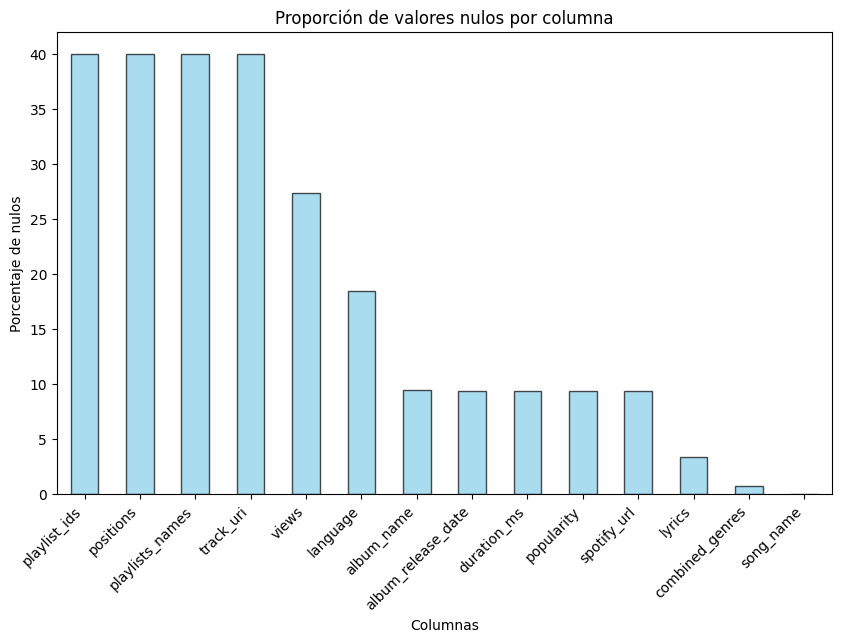

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


# Crear un gráfico de barras para proporciones de nulos
missing_data = df.isnull().mean() * 100  # Proporción de nulos por columna
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)  # Filtrar columnas con nulos

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Proporción de valores nulos por columna")
plt.ylabel("Porcentaje de nulos")
plt.xlabel("Columnas")
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126091 entries, 0 to 126090
Data columns (total 87 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   artist_name                         126091 non-null  object 
 1   song_name                           126090 non-null  object 
 2   recording_id                        126091 non-null  object 
 3   danceable                           126091 non-null  float64
 4   not_danceable                       126091 non-null  float64
 5   male                                126091 non-null  float64
 6   female                              126091 non-null  float64
 7   timbre_bright                       126091 non-null  float64
 8   timbre_dark                         126091 non-null  float64
 9   tonal                               126091 non-null  float64
 10  atonal                              126091 non-null  float64
 11  instrumental              

In [73]:
# Función para contar palabras clave en una columna de listas o strings
def count_keywords(column):
    all_words = []
    for value in column.dropna():
        if isinstance(value, list):
            all_words.extend(value)
        elif isinstance(value, str):
            all_words.extend(value.split())
    return Counter(all_words)

# Contar palabras clave
combined_genres_counter = count_keywords(d_clean['combined_genres'])

# Obtener las 15 palabras más frecuentes
combined_genres_top = combined_genres_counter.most_common(15)

# Crear gráficos
plt.figure(figsize=(12, 6))


# Gráfico para 'combined_genres'
plt.subplot(1, 2, 2)
plt.barh([x[0] for x in combined_genres_top], [x[1] for x in combined_genres_top], alpha=0.7, color='green')
plt.title('Palabras más frecuentes en combined_genres')
plt.xlabel('Frecuencia')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Paso 2: Proporción de valores nulos
nulls = {
    
    "combined_genres": df['combined_genres'].isnull().mean()
}

# Gráfico de proporción de valores nulos
plt.figure(figsize=(8, 6))
plt.bar(nulls.keys(), nulls.values(), color=['blue', 'green'], alpha=0.7)
plt.title("Proporción de valores nulos")
plt.ylabel("Proporción")
plt.show()

# Paso 3: Comparación del número de etiquetas por fila
combined_genres_counts = df['combined_genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Gráfico de comparación de etiquetas por fila
plt.figure(figsize=(8, 6))
plt.hist(combined_genres_counts, bins=20, alpha=0.7, label='combined_genres', color='green')
plt.title('Distribución del número de etiquetas por fila')
plt.xlabel('Número de etiquetas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


NameError: name 'd_clean' is not defined

### 'album_name', 'popularity', 'album_release_date', 'spotify_url'

In [6]:
import pandas as pd

file_path = r"C:\Users\solan\Downloads\get_data_from_songs\data\final_url.csv"
df_clean = pd.read_csv(file_path, low_memory=False)

In [7]:
# Crear un nuevo dataframe con las columnas de interés
columns_to_check = ['album_name', 'popularity', 'album_release_date', 'spotify_url']
df_no_url = df_clean[columns_to_check]

# Contar nulos en cada columna
null_counts = df_no_url.isnull().sum()

# Mostrar resultados
print("Número de nulos por columna:")
print(null_counts)

# Verificar si todas las columnas tienen el mismo número de nulos
same_nulls = null_counts.nunique() == 1
print(f"\n¿Tienen todas las columnas el mismo número de nulos? {'Sí' if same_nulls else 'No'}")
print(f"\nParece igualmente que es caso de urls no encontradas, voy a pasarlas de nuevo a buscar urls por si hubiera suerte")


Número de nulos por columna:
album_name            6191
popularity            6172
album_release_date    6172
spotify_url           6171
dtype: int64

¿Tienen todas las columnas el mismo número de nulos? No

Parece igualmente que es caso de urls no encontradas, voy a pasarlas de nuevo a buscar urls por si hubiera suerte


In [5]:
# Crear un dataframe con filas que tienen valores nulos en 'spotify_url'
df_no_url = df[df['spotify_url'].isnull()]

# Verificar las primeras filas del nuevo dataframe
print(df_no_url.head())

# Guardar el nuevo dataframe como un archivo CSV
df_no_url.to_csv('df_no_url.csv', index=False)
print("El archivo `df_no_url.csv` ha sido guardado exitosamente.")


         artist_name              song_name  \
30      kina grannis               together   
53   maximum balloon             the lesson   
59       i am arrows                    nun   
92    kill the noise    perfect combination   
108        los lobos  the lady and the rose   

                             recording_id  danceable  not_danceable   male  \
30   02352d4b-c907-4724-b515-c9c8a0849200      0.164          0.836  0.999   
53   037d34c3-b68d-4649-ad93-41f7dea68d13      0.934          0.066  0.653   
59   03c73e10-435b-4770-b7ca-93dc78ffc24b      0.991          0.009  0.974   
92   0665c0ec-3dfe-4312-845f-bd863cd03080      1.000          0.000  0.990   
108  075e85aa-979a-4280-ae69-6eb66c2603e8      0.930          0.070  0.029   

     female  timbre_bright  timbre_dark  tonal  ...  duration_ms  popularity  \
30    0.001          0.848        0.152  0.051  ...          NaN         NaN   
53    0.347          0.228        0.772  0.069  ...          NaN         NaN   
59    0.

Duplicados

In [1]:
# Paso 1: Contar duplicados por columna
duplicate_counts = df.apply(lambda col: col.duplicated().sum())

# Mostrar el número de duplicados por columna
print("Número de duplicados por columna:")
print(duplicate_counts)



NameError: name 'df' is not defined